# Music Events

## How has the revenue from music events changed in recnet years and the trends in the future?

Data Set:"Music Events revenue in Worldwide from 2017-2028"
Data published in March 2024, source form Statista Market Insights

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime


In [4]:
%matplotlib inline

In [5]:
plt.rcParams["figure.figsize"] = (10, 5)


In [6]:
saved_style_state = matplotlib.rcParams.copy()  # give us a style state to go back to

In [7]:
# Reading the file and loading data
if os.path.isfile("eservices_event-tickets_music-events_worldwide_AUD_en (1).xlsx"):
    filepath = "eservices_event-tickets_music-events_worldwide_AUD_en (1).xlsx"

else:
    filepath = "https://www.statista.com/outlook/dmo/eservices/event-tickets/music-events/worldwide?currency=AUD"
    print("loading from the internet")


The Music industry Worldwide has experienced important growth and development in recent years. Music has always been a common language; it can overrun borders and cultures, and live music events have become one of the most useful ways to make people play together. The music event industry includes concerts, music festivals, musicals, and music shows. People are increasingly finding unique experiences, and live music events can provide them. Over the years, the landscape of live music shows has developed strongly, changing the consumer preferences and causing something unexpected like the COVID-19 pandemic.

From 2017 to 2019, the industry grew in live shows. More and more people would like to choose offline performances as entertainment. But in 2020 brought an unexpected challenge for the whole world. 

In [8]:

revenue_df = pd.read_excel(filepath, sheet_name="Global Comparison", skiprows=3, skipfooter=156)


In [9]:
pen_df = pd.read_excel(filepath, sheet_name="Global Comparison", skiprows=157, skipfooter=2)

In [10]:
cdf=revenue_df.set_index("Country").T

In [11]:
revenue_df.columns

Index(['Country', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       '2024', '2025', '2026', '2027', '2028'],
      dtype='object')

Based on this dataset, there are 12 rows and 149 columns, including the revenue ($AU) from music events in each country. 

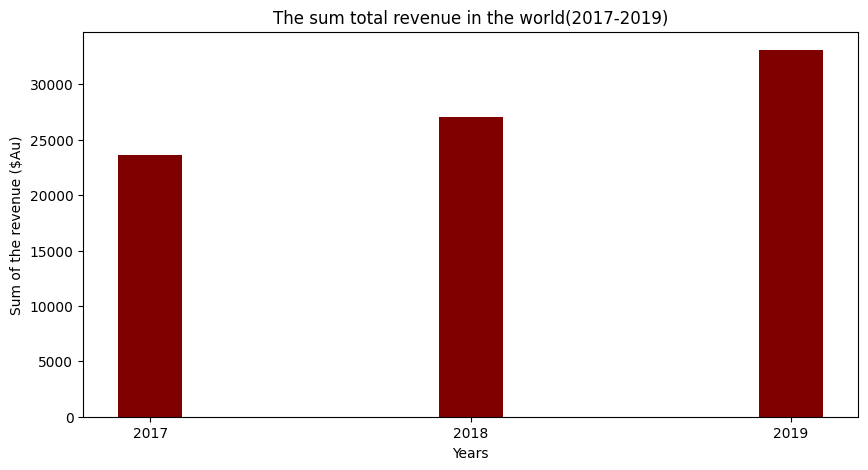

In [12]:
data = {'2017': 23596.09, '2018': 27100.13, '2019': 33099.23}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon', width = 0.2)

plt.xlabel("Years")
plt.ylabel("Sum of the revenue ($Au)")
plt.title("The sum total revenue in the world(2017-2019)")
plt.show()


  From 2017 to 2019, global music events’ revenue experienced wonderful growth. In 2017, the music industry’s revenue was approximately $23.6 million. It can show that it is a basement for future expansion. By 2018, the revenue had increased to $27.1 billion, representing the rise of music events. This growth with many different factors, including the rise of music festivals and concerts, the price of tickets, and the global live performances of some famous singers. revenue in 2019, the revenue reached $33.1 billion. Compared with 2019 and 2017 the revenue has increased quickly. It means that around the world, these events have good management. The importance of expansion is brand partnerships in the event shows.

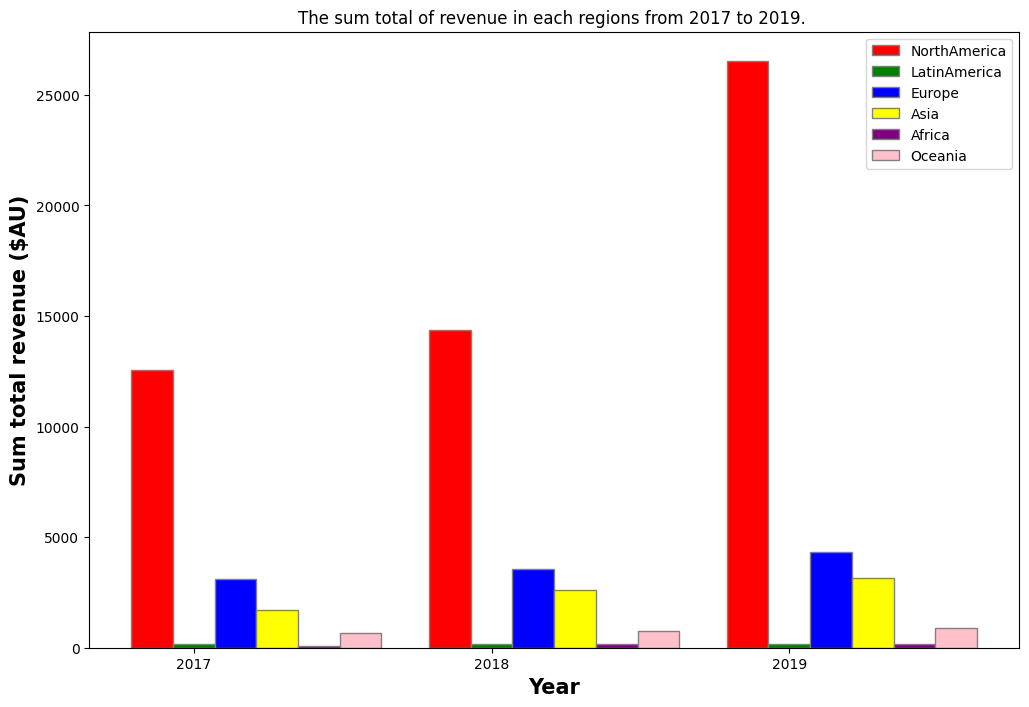

In [13]:
# Making the Bar chart
barWidth = 0.14
fig = plt.subplots(figsize =(12, 8)) 
# set height of bar 
NorthAmerica = [12538, 14388, 26532] 
LatinAmerica = [147.03, 177.65, 182.6] 
Europe = [3096.2,3552.2, 4329] 
Asia = [1712.16, 2605.15,3164.4]
Africa = [90.08, 148.97, 154.97]
Oceania = [660.48, 744.14, 888.91]
# Set position of bar on X axis 
br1 = np.arange(len(NorthAmerica)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
# Make the plot
plt.bar(br1, NorthAmerica, color ='r', width = barWidth, 
        edgecolor ='grey', label ='NorthAmerica') 
plt.bar(br2, LatinAmerica, color ='g', width = barWidth, 
        edgecolor ='grey', label ='LatinAmerica') 
plt.bar(br3, Europe, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Europe') 
plt.bar(br4, Asia, color='yellow',width = barWidth,
        edgecolor = 'grey', label = 'Asia')
plt.bar(br5, Africa, color='Purple',width = barWidth,
        edgecolor = 'grey', label = 'Africa')
plt.bar(br6, Oceania, color='Pink',width = barWidth,
        edgecolor = 'grey', label = 'Oceania')
# Adding Xticks 
plt.xlabel('Year', fontweight ='bold', fontsize = 15) 
plt.ylabel('Sum total revenue ($AU)', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(NorthAmerica))], 
        ['2017', '2018', '2019'])
plt.title('The sum total of revenue in each regions from 2017 to 2019. ')
plt.legend()
plt.show() 

This chart shows the total revenue from music events from 2017 to 2019, expressed in $AU. In the whole chart, the revenue worldwide has steadily risen. North America always leads the highest revenue, with a significant increase in 2019, and their revenue was 25,000 $AU. Europe and Asia are the next highest level, and South Africa, Latin America, and Oceania show much lower than others. Music events' revenue in six regions grew and was driven by unique backgrounds. 
So, based on different cultural references, the revenue from music events in each region has huge differences from each other.

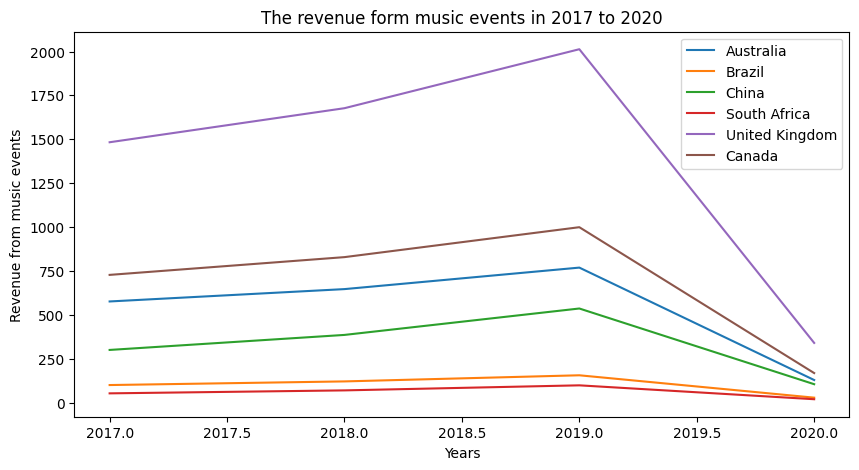

In [86]:
# The line plot chart from revenue
x1 = [2017,2018,2019,2020]
y1 = [575.9,646.3, 768.8, 128.3]
plt.plot(x1, y1, label = "Australia")

y2 = [99.68, 120.4, 155.3, 27.84]
plt.plot(x1, y2, label = "Brazil")

y3 = [299.7, 385.3, 535.8,104.5]
plt.plot(x1, y3, label = "China")

y4 = [52.34,69.27,98.04,18.92]
plt.plot(x1, y4, label = "South Africa")

y5 = [1483, 1677, 2013, 339.7]
plt.plot(x1, y5, label = "United Kingdom")

y6 = [727.3, 828.5, 999, 167.9]
plt.plot(x1, y6, label = "Canada")

plt.xlabel('Years')
plt.ylabel('Revenue from music events')
plt.title('The revenue form music events in 2017 to 2020')
plt.legend()
plt.show()

In this graph, the data show the revenue in six countries from six regions. From 2017 to 2019, the revenue has steadily risen in each country. However, 2020 brought a huge challenge to the COVID-19 pandemic. With the high frequency of cancellations and ticket refunds, Based on these special situations, revenue from music events dropped quickly and impacted economic problems. It means that, whatever the country, they all meet the economic problem of COVID-19.

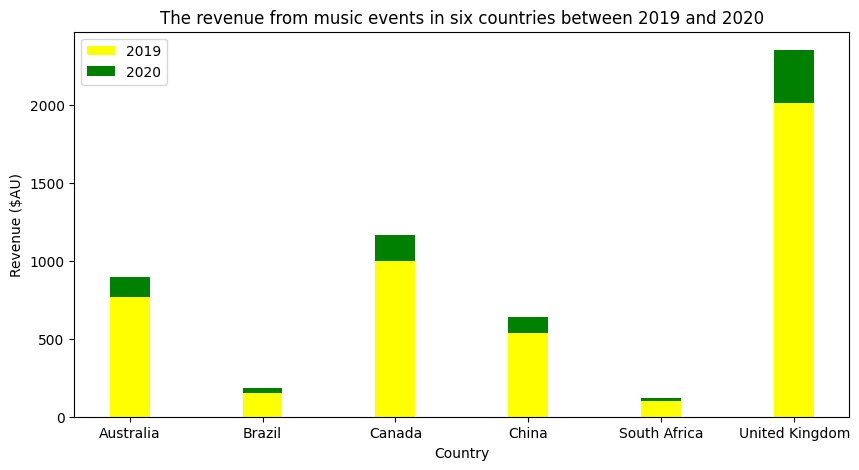

In [85]:
# The Bar chart
x = ['Australia', 'Brazil', 'Canada', 'China','South Africa','United Kingdom']
y1 = [768.8, 155.3, 999.5, 535.8, 98.08, 2013 ]
y2 = [128.3, 27.84, 167.9, 104.5, 18.92, 339.7]

# plot bars in stack manner
plt.bar(x, y1, color='Yellow',width=0.3)
plt.bar(x, y2, bottom=y1, color='Green',width=0.3)
plt.xlabel('Country')
plt.ylabel('Revenue ($AU)')
plt.title("The revenue from music events in six countries between 2019 and 2020")
plt.legend(['2019','2020'])
plt.show()

This bar chart shows the revenue from music events in six countries between 2019 and 2020. The yellow bars represent the revenue in 2019, and the green bars represent 2020. In 2020, the highest revenue was the United Kingdom, but it also had a huge drop by 2019. Other countries, such as Canada and China, also had slight increases in revenue. Others had minimal revenue but also had a contrast between 2019 and 2020. This chart highlights the revenue trend in six regions between 2019 and 2020.

In [15]:
tdf=pen_df.set_index("Country").T
tdf.head(5)

Country,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
2017,1.65,2.23,2.67,1.95,1.80,18.17,15.52,2.30,15.11,0.98,...,1.02,1.89,11.92,20.67,18.34,8.30,0.73,1.54,1.29,1.26
2018,1.73,2.37,2.92,1.98,1.92,18.29,15.88,2.48,15.92,1.01,...,1.09,2.00,12.08,21.01,19.05,8.68,0.77,1.70,1.38,1.34
2019,1.83,2.53,3.22,2.00,2.05,18.45,16.36,2.69,16.89,1.05,...,1.17,2.13,12.34,21.42,19.85,9.15,0.83,1.89,1.49,1.43
2020,1.94,2.72,3.55,0.30,2.20,2.80,2.53,2.92,18.01,1.10,...,1.26,2.27,12.74,3.28,3.12,9.68,0.89,0.32,1.60,1.53
2021,2.04,2.90,3.88,0.36,2.35,3.40,3.11,3.15,19.10,1.15,...,1.35,2.41,13.12,4.04,3.92,10.21,0.95,0.42,1.72,1.63


Within the dataset, the 12 rows and 149 columns show that the user penetration (%) in each country.

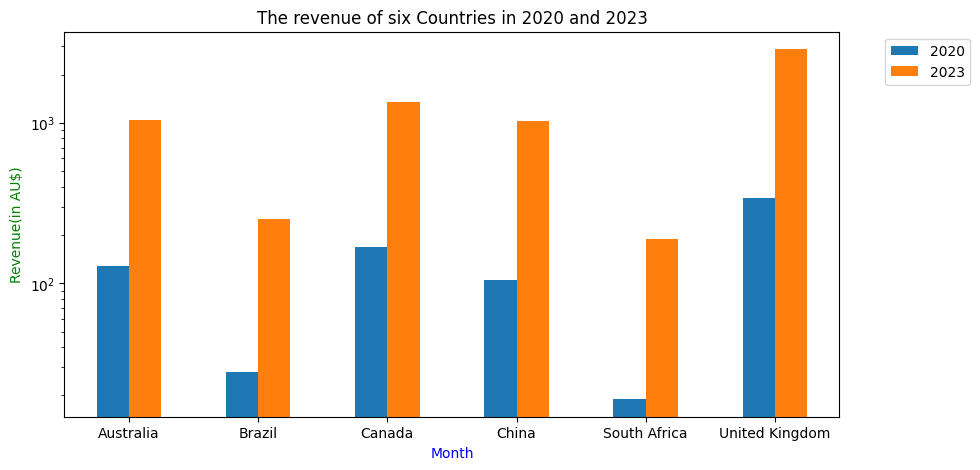

In [46]:
df1 = pd.DataFrame({"Country":['Australia','Brazil','Canada','China','South Africa','United Kingdom'], "2020":[128.3,27.84,167.9,104.5,18.92,339.7]})
df2 = pd.DataFrame({"Country":['Australia','Brazil','Canada','China','South Africa','United Kingdom'], "2023":[1038,250.5,1351,1024,188.2,2877]})
df=pd.merge(df1, df2, on='Country')
ax=df.plot(kind='bar',x='Country',logy=True, rot=0)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel('Month',color='blue')
ax.set_ylabel('Revenue(in AU$)',color='Green')
ax.set_title("The revenue of six Countries in 2020 and 2023")
plt.show()


In this bar chat, the revenue from music events ranged from $18.92 million to $339.7 million in 2020. Highlighting a year of difference, likely influenced by the COVID-19 pandemic. But in 2023, the lowest revenue was $188.2 million, and the highest was $2877 million. Compared with these two amounts, it can shows that COVID-19 has a huge impact on revenue, and in 2023, music industry revenue is one of the main factors in each country’s economy. The data also highlights the remarkable adaptability of all countries in overcoming previous challenges.

## The data in the future.

Look ahead; we have analysed the revenue from 2017 to 2023. Now, from 2025 to 2028, the revenue will also grow in the music events industry. In the last 6 years, COVID-19 has had a huge impact on revenue. But in the future, expect any special conditions, and revenue and user penetration will rise steadily.

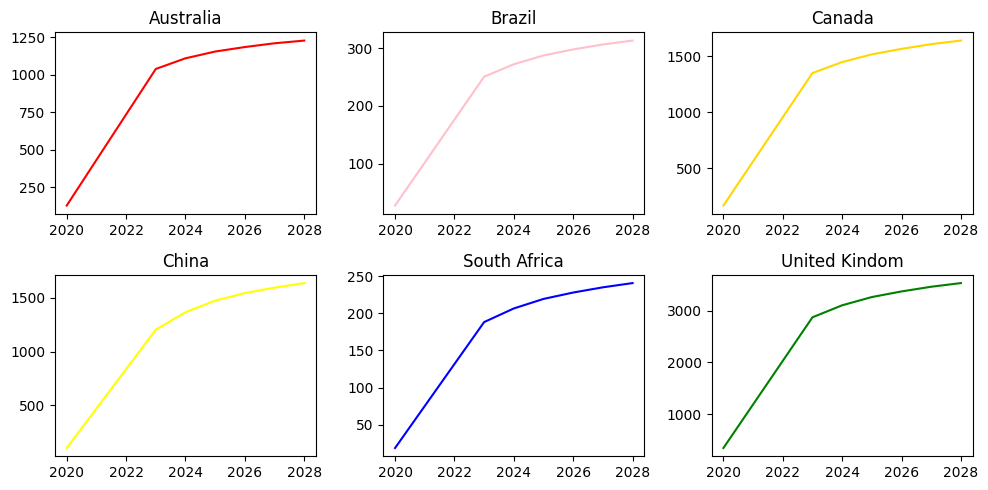

In [82]:
# The six countries with revenue
X = [2020,2023,2024,2025,2026,2027,2028] 
Y1 = [128.30,1038.00, 1109.00, 1154.00, 1184.00, 1209.00, 1227.00]
Y2 = [27.84,250.50,272.00,287.20,297.60	,306.20,312.90]
Y3 = [167.90,1351.00,1449.00,1518.00,1567.00,1609.00,1641.00]
Y4 = [104.50,1204.00,1366.00,1474.00,1544.00,1595.00,1637.00]
Y5 = [18.92	,188.20	,206.50	,219.30	,227.90	,234.90	,240.60]
Y6 = [339.70,2877.00,3110.00,3270.00,3379.00,3470.00,3541.00]
figure, axis = plt.subplots(2,3)
axis[0, 0].plot(X, Y1,color = "Red")
axis[0, 0].set_title("Australia")

axis[0, 1].plot(X, Y2,color = "Pink")
axis[0, 1].set_title("Brazil")

axis[0,2].plot(X, Y3,color = "Gold")
axis[0,2].set_title("Canada")

axis[1,0].plot(X, Y4,color="Yellow")
axis[1,0].set_title("China")

axis[1,1].plot(X, Y5,color ="Blue")
axis[1,1].set_title("South Africa")

axis[1,2].plot(X, Y6,color = "Green")
axis[1,2].set_title("United Kindom")

plt.tight_layout()
plt.show()


In these 6 graphs, the y-axis show the revenue of each country and x-axis is the year. Starting from a challenging year in 2020, where the industry had a huge drop at that year. By 2023, the revenue levels came back quickly and it shows that the live shows returned to the market. The growth rate is expected to continue, and will still increase in 2028. The turning points are all in 2023, because this year has a huge change in the music events. The graphics show that the indicate growth in revenue for all countries and then the trending is regularly balancing.

In conclusion, the global revenue and user penetration in the music industry from 2017 to 2028. The early years saw a steady increase, which has a big challenge in 2020. However, the music industry came a new level by 2023 and is continuing to grow into the future. The period from 2025 to 2028 will be increased step by step. Overall, the live music shows can innovate and capture global audiences, ensuring success into the next few years.